# Motivation

The project aims for understanding correlation between global stock indices and spread of COVID-19. Is there significant correlation between certain degree of COVID-19 and market fluctuation? While it is certain that March in 2020 should showcase strong correlation, it is still controversial if it is still valid hypothesis in year-round analysis. While the year of 2020 has been one of the most interesting years to measure the impact of one macroeconomic variable on entire market, I intend to understand how market has fluctuated in 2020.

# Literature Review

The paper `Principal Components as a Measure of Systemic Risk` written by Kritzman et al. (2010) [[1]](https://doi.org/10.3905/jpm.2011.37.4.112) introduces how we could use Principal Component Analysis as a method to measure systemic risk. _Principal Component Analysis (PCA)_ is to extract features by applying an orthogonal transformation into simpler dimensional data. It is often used to simplify complexity of high-dimensional data because it preserves almost all information with minimizing the dimensions of data as small as possible. Kritzman et al. (2010) [[1]](https://doi.org/10.3905/jpm.2011.37.4.112) argues that Principal Component Analysis could measure systemic risk.

## Systemic Risk

__Systemic Risk__ defines a ratio of systematic risk to idiosyncratic risk. Because systematic risk describes risk that is shared by entire market, idiosyncratic risk is about specific part of market. In other words, systemic risk measures how fragile the market is. According to the paper of Kritzman et al. (2010):

> "the absorption ratio, which equals the fraction of the total variance of a set of asset returns explained or “absorbed” by a fixed number of eigenvectors. The absorption ratio captures the extent to which markets are unified or tightly coupled. When markets are tightly coupled, they are more fragile in the sense that negative shocks propagate more quickly and broadly than when markets are loosely linked." 

However, in my project, I only use Principal Component Analysis up to the use that measures correlaion bewteen economic variables. `Explained variance`, or the `absorption ratio`, essentially measures degree of correlation, and it is reasonable to understand how market fluctuation is correlated with the spread of COVID-19 in 2020.

# Principal Component Analysis

## Load Packages

In [1]:
# Load Packages

import yfinance as yf
import csv
import pandas as pd
import numpy as np
from datetime import date, time, timedelta
import datetime
from countryinfo import CountryInfo
from datetime import datetime, timedelta
from sklearn.decomposition import PCA
from datapackage import Package
from sklearn.cluster import KMeans

today = datetime.today()
yesterday = str(today - timedelta(2))[:10]

# Convert Date
def date_convert(dates):
    dates_return = []
    
    for date in dates:
        date = date.split("/")
        year = '20' + str(date[2])
        month = str(date[0])
        day = str(date[1])
        
        if int(month) < 10:
            month = '0' + month
        
        if int(day) < 10:
            day = '0' + day
        
        date = year + "-" + month + "-" + day
        dates_return.append(date)
    
    return dates_return

start = "2020-01-22"
end = "2021-01-01"

# Matplotlib 
import matplotlib.pyplot as plt
pd.set_option('max_rows', 500)
pd.set_option('max_columns', 500)
np.set_printoptions(suppress=True)

%matplotlib inline
plt.rcParams["figure.figsize"] = (16, 12)
plt.style.use('seaborn-pastel')
plt.rcParams['lines.linewidth'] = 1
plt.figure(dpi=300)
plt.rcParams['lines.color'] = 'b'
plt.rcParams['axes.grid'] = True
plt.tight_layout()

<Figure size 4800x3600 with 0 Axes>

## Import 40 Global Stock Indices

This part of code imports __40 Global Indices__ as a representation of how global market has worked during 2020 since the outbreak of Coronavirus.

In [2]:
# Import Market Indices
SPY = yf.download("SPY", start, end)['Adj Close'].to_frame()
Singapore = yf.download("^STI", start, end)['Adj Close'].to_frame()
Dow = yf.download("^DJI", start, end)['Adj Close'].to_frame()
Nasdaq = yf.download("^IXIC", start, end)['Adj Close'].to_frame()
FTSE100 = yf.download("^FTSE", start, end)['Adj Close'].to_frame()
FTSE250 = yf.download("^FTSE", start, end)['Adj Close'].to_frame()
FTSE350 = yf.download("^FTLC", start, end)['Adj Close'].to_frame()
FTAI = yf.download("^FTAI", start, end)['Adj Close'].to_frame()
N225 = yf.download("^N225", start, end)['Adj Close'].to_frame()
N500 = yf.download("^N500", start, end)['Adj Close'].to_frame()
N1000 = yf.download("^N1000", start, end)['Adj Close'].to_frame()
HSI = yf.download("^HSI", start, end)['Adj Close'].to_frame()
Taiwan = yf.download("^TWII", start, end)['Adj Close'].to_frame()
SSE = yf.download("000001.SS", start, end)['Adj Close'].to_frame()
Shenzhen = yf.download("399001.SZ", start, end)['Adj Close'].to_frame()
DAX = yf.download("^GDAXI", start, end)['Adj Close'].to_frame()
France = yf.download("^FCHI", start, end)['Adj Close'].to_frame()
Indonesia = yf.download("^JKSE", start, end)['Adj Close'].to_frame()
PSEI = yf.download("PSEI.PS", start, end)['Adj Close'].to_frame()
AORD = yf.download("^AORD", start, end)['Adj Close'].to_frame()
AXJO = yf.download("^AXJO", start, end)['Adj Close'].to_frame()
AXKO = yf.download("^AXKO", start, end)['Adj Close'].to_frame()
kospi = yf.download("^KS11", start, end)['Adj Close'].to_frame()
India = yf.download("^BSESN", start, end)['Adj Close'].to_frame()
NZ50 = yf.download("^NZ50", start, end)['Adj Close'].to_frame()
XAX = yf.download("^XAX", start, end)['Adj Close'].to_frame()
RUI = yf.download("^RUI", start, end)['Adj Close'].to_frame()
RUT = yf.download("^RUT", start, end)['Adj Close'].to_frame()
RUA = yf.download("^RUA", start, end)['Adj Close'].to_frame()
GSPTSE = yf.download("^GSPTSE", start, end)['Adj Close'].to_frame()
N100 = yf.download("^N100", start, end)['Adj Close'].to_frame()
N150 = yf.download("^N150", start, end)['Adj Close'].to_frame()
BFX = yf.download("^BFX", start, end)['Adj Close'].to_frame()
IMOEX = yf.download("IMOEX.ME", start, end)['Adj Close'].to_frame()
MERV = yf.download("^MERV", start, end)['Adj Close'].to_frame()
TA125 = yf.download("^TA125.TA", start, end)['Adj Close'].to_frame()
JN0U = yf.download("^JN0U.JO", start, end)['Adj Close'].to_frame()
AEX = yf.download("^AEX", start, end)['Adj Close'].to_frame()
ATOI = yf.download("^ATOI", start, end)['Adj Close'].to_frame()
BVSP = yf.download("^BVSP", start, end)['Adj Close'].to_frame()
MIB = yf.download("FTSEMIB.MI", start, end)['Adj Close'].to_frame()
ATX = yf.download("^ATX", start, end)['Adj Close'].to_frame()
ISEQ = yf.download("^ISEQ", start, end)['Adj Close'].to_frame()
NSEI = yf.download("^NSEI", start, end)['Adj Close'].to_frame()
MXX = yf.download("^MXX", start, end)['Adj Close'].to_frame()
SSMI = yf.download("^SSMI", start, end)['Adj Close'].to_frame()
STOXX50E = yf.download("^STOXX50E", start, end)['Adj Close'].to_frame()
MDAXI = yf.download("^MDAXI", start, end)['Adj Close'].to_frame()
SDAXI = yf.download("^SDAXI", start, end)['Adj Close'].to_frame()
HSCC = yf.download("^HSCC", start, end)['Adj Close'].to_frame()
HSCE = yf.download("^HSCE", start, end)['Adj Close'].to_frame()
KLSE = yf.download("^KLSE", start, end)['Adj Close'].to_frame()

# Transform into Dataframe
df = pd.concat([
    Dow, 
    Nasdaq, 
    FTSE100, 
    FTSE250, 
    FTAI, 
    N225, 
    SSE, 
    Shenzhen, 
    DAX, 
    France, 
    Indonesia, 
    PSEI, 
    AXKO,
    kospi, 
    NZ50,
    RUI, 
    RUT, 
    RUA, 
    GSPTSE,  
    N100, 
    N150, 
    BFX, 
    IMOEX, 
    MERV, 
    TA125, 
    JN0U, 
    SPY, 
    Singapore, 
    AEX, 
    ATOI,
    BVSP,
    MIB,
    ATX,
    ISEQ,
    MXX,
    STOXX50E,
    MDAXI,
    SDAXI,
    KLSE
], axis=1)

# Set Columns
df.columns=[
    'US-Dow', 
    'US-Nasdaq', 
    'GB-FTSE100', 
    'GB-FTSE250', 
    'GB-FTAI', 
    'JP-N225', 
    'CN-SSE', 
    'CN-Shenzhen', 
    'DE-DAX', 
    'FR-FCHI', 
    'ID-JKSE', 
    'PH-PSEI', 
    'AU-AXKO',
    'KR-KSII', 
    'NZ-NZ50',
    'US-RUI', 
    'US-RUT', 
    'US-RUA', 
    'CA-GSPTSE', 
    'FR-N100', 
    'FR-N150', 
    'BE-BFS', 
    'RU-IMOEX', 
    'AR-MERV', 
    'IL-TA125', 
    'ZA-JN0U', 
    'US-SPX', 
    'SG-STI', 
    'NL-AEX', 
    'AU-ATOI',
    'BR-BVSP',
    'IT-MIB',
    'AT-ATX',
    'IE-ISEQ',
    'MX-MXX',
    'DE-Stoxx50E',
    'DE-MDAXI',
    'DE-SDAXI',
    'MY-KLSE'
]

# Eliminate Missing Values
daily_return = df.fillna(method='ffill').fillna(method='bfill')
daily_return1 = daily_return

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

## Import COVID-19 Confirmed

In [3]:
# COVID-19 Dataset

states_url = "https://covidtracking.com/api/states/daily"
us_url = "https://covidtracking.com/api/us/daily"
case_threshold = 100

cases = ["confirmed", "deaths", "recovered"]
sheet = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_"
suffix = "_global.csv"
df_list = []

url_confirmed = sheet + "confirmed" + suffix

df_confirmed = pd.read_csv(url_confirmed, header=0, escapechar="\\")
df_confirmed1 = df_confirmed.drop(columns=["Lat", "Long"])
df_confirmed = df_confirmed.drop(columns=["Lat", "Long"])

df_confirmed = df_confirmed.groupby("Country/Region").agg("sum").T
df_confirmed1 = df_confirmed1.groupby("Province/State").agg("sum").T

# Preprocess Data
dates = df_confirmed.index.tolist()
dates = date_convert(dates)
US = df_confirmed["US"].tolist()
China = df_confirmed["China"].tolist()
Germany = df_confirmed["Germany"].tolist()
Japan = df_confirmed["Japan"].tolist()
UK = df_confirmed["United Kingdom"].tolist()
Korea = df_confirmed["Korea, South"].tolist()
Australia = df_confirmed["Australia"].tolist()
Austria = df_confirmed["Austria"].tolist()
Denmark = df_confirmed["Denmark"].tolist()
Greece = df_confirmed["Greece"].tolist()
Finland = df_confirmed["Finland"].tolist()
Ireland = df_confirmed["Ireland"].tolist()
Italy = df_confirmed["Italy"].tolist()
SouthAfrica = df_confirmed["South Africa"].tolist()
Spain = df_confirmed["Spain"].tolist()
Singapore = df_confirmed["Singapore"].tolist()
Russia = df_confirmed["Russia"].tolist()
NewZealand = df_confirmed["New Zealand"].tolist()
Canada = df_confirmed["Canada"].tolist()
France = df_confirmed["France"].tolist()
Netherlands = df_confirmed["Netherlands"].tolist()
Mexico = df_confirmed["Mexico"].tolist()
Brazil = df_confirmed["Brazil"].tolist()
Philippines = df_confirmed["Philippines"].tolist()
India = df_confirmed["India"].tolist()
Argentina = df_confirmed["Argentina"].tolist()
Indonesia = df_confirmed["Indonesia"].tolist()
Malaysia = df_confirmed["Malaysia"].tolist()
Israel = df_confirmed["Israel"].tolist()
Poland = df_confirmed["Poland"].tolist()
Afghanistan = df_confirmed["Afghanistan"].tolist()

data = [
    US, China, Japan, 
    Korea, Australia, Austria, 
    Germany, UK, Denmark, 
    Greece, Italy, SouthAfrica, 
    Spain, Singapore, Russia, 
    NewZealand, Canada, France, 
    Netherlands, Mexico, Philippines, 
    India, Argentina, Indonesia, 
    Malaysia, Israel, Poland, 
    Brazil, Spain
]

# Country Codes
country_codes = [
    "US", "CN", "JP", 
    "KR", "AU", "AT", 
    "DE", "GB", "DK", 
    "GR", "IT", "ZA", 
    "ES", "SG", "RU", 
    "NZ", "CA", "FR", 
    "NL", "MX", "PH", 
    "IN", "AR", "ID", 
    "MY", "IL", "PL", 
    "BR", "ES"
]

daily_confirmed = pd.DataFrame(data, index=country_codes, columns=dates).T.diff(1).replace([np.nan, np.inf, -np.inf], np.nan).fillna(0)

for code in country_codes:
    population = CountryInfo(code).population()
    daily_confirmed[code] = daily_confirmed[code].div(population, axis=0)

daily_confirmed.index.name = 'Date'
daily_confirmed1 = daily_confirmed

## Merge Dataframe (Daily Return + Daily Confirmed)

In [4]:
# List of Dates
confirmed = daily_confirmed.index.tolist()
returns = daily_return.index.tolist()

# Build a list to include dates in common
dates_common = []
for date in returns:
    date = (str(date)[:10])
    if date in confirmed:
        dates_common.append(date)

# Only leave dates in common from daily_confirmed
for date in daily_confirmed.index:
    if date not in dates_common:
        daily_confirmed = daily_confirmed.drop(date)

# Only leave dates in common from daily_return
daily_return_index = []
for var in daily_return.index.tolist():
    date = (str(var))[:10]
    if date not in dates_common:
        daily_return = daily_return.drop(var)
    
    else:
        daily_return_index.append(str(date))

daily_return.index = daily_return_index
daily_return.index.name = 'Date'

# Now, merge them in same index
df_merged = pd.concat([daily_return, daily_confirmed], axis=1)

## Normalize Dataframe

Before diving into dataframe, I need to normalize data as there is too huge difference.

In [5]:
# apply the z-score method in Pandas using the .mean() and .std() methods
def z_score(df):
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std

df_merged = z_score(df_merged)
df_merged.head()

,US-Dow,US-Nasdaq,GB-FTSE100,GB-FTSE250,GB-FTAI,JP-N225,CN-SSE,CN-Shenzhen,DE-DAX,FR-FCHI,ID-JKSE,PH-PSEI,AU-AXKO,KR-KSII,NZ-NZ50,US-RUI,US-RUT,US-RUA,CA-GSPTSE,FR-N100,FR-N150,BE-BFS,RU-IMOEX,AR-MERV,IL-TA125,ZA-JN0U,US-SPX,SG-STI,NL-AEX,AU-ATOI,BR-BVSP,IT-MIB,AT-ATX,IE-ISEQ,MX-MXX,DE-Stoxx50E,DE-MDAXI,DE-SDAXI,MY-KLSE,US,CN,JP,KR,AU,AT,DE,GB,DK,GR,IT,ZA,ES,SG,RU,NZ,CA,FR,NL,MX,PH,IN,AR,ID,MY,IL,PL,BR,ES
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0.939547,-0.588920,2.638425,2.638425,0.518385,0.593683,-0.265409,-0.852392,1.002068,1.965973,2.073910,1.793167,1.908808,0.152902,0.388593,0.255018,0.742344,0.295330,1.214549,1.765530,1.423998,1.889892,1.350814,-0.036628,2.281831,1.494917,0.213724,2.563842,1.190420,1.982149,1.543137,1.707168,2.344428,1.163883,2.083301,1.717660,0.880938,0.445955,0.749134,-0.931591,-0.240411,-0.770413,-0.678543,-0.608785,-0.569349,-0.617341,-0.698235,-0.593634,-0.579911,-0.622729,-0.781292,-0.776747,-0.669622,-1.062938,-0.418028,-0.822006,-0.546408,-0.700558,-1.146176,-0.977223,-1.000833,-0.974345,-1.010972,-0.606623,-0.77309,-0.549867,-1.188057,-0.776747
2020-01-23,0.929251,-0.576386,2.515415,2.515415,0.475218,0.493928,-0.622814,-1.128935,0.899557,1.888358,2.104868,2.014524,1.830729,0.078752,0.401234,0.265638,0.744795,0.305320,1.230693,1.670931,1.327632,1.779004,1.207118,-0.143357,2.255830,1.293148,0.224871,2.477405,1.061627,1.902600,1.628281,1.707612,2.246994,1.096735,2.044253,1.610125,0.781045,0.363458,0.710835,-0.931591,-0.160476,-0.770413,-0.678543,-0.608785,-0.569349,-0.617341,-0.698235,-0.593634,-0.579911,-0.622729,-0.781292,-0.776747,-0.665700,-1.062938,-0.418028,-0.822006,-0.546408,-0.700558,-1.146176,-0.977223,-1.000833,-0.974345,-1.010972,-0.606623,-0.77309,-0.549867,-1.188057,-0.776747
2020-01-24,0.862253,-0.635046,2.665442,2.665442,0.498276,0.507350,-0.622814,-1.128935,1.051121,1.992273,2.094846,2.025110,1.834866,0.078752,0.375466,0.181131,0.643307,0.219231,1.189044,1.790602,1.342677,1.851744,1.228616,-0.294686,2.255830,1.345032,0.138341,2.501770,1.248528,1.908937,1.542014,1.823824,2.316883,1.177827,1.942126,1.748249,0.898508,0.459396,0.693202,-0.931575,-0.007338,-0.770413,-0.674811,-0.608785,-0.569349,-0.617341,-0.698235,-0.593634,-0.579911,-0.622729,-0.781292,-0.776747,-0.661777,-1.062938,-0.418028,-0.822006,-0.546266,-0.700558,-1.146176,-0.977223,-1.000833,-0.974345,-1.010972,-0.606623,-0.77309,-0.549867,-1.188057,-0.776747
2020-01-27,0.683732,-0.752674,2.332239,2.332239,0.383163,0.302830,-0.622814,-1.128935,0.751703,1.672941,1.876954,1.971458,1.834866,0.078752,0.297312,0.035360,0.562714,0.078219,1.098522,1.486264,1.140706,1.557287,0.966164,-0.333466,1.869836,1.012109,-0.016237,2.501770,0.911369,1.908937,1.250413,1.578536,2.176897,1.009560,1.634891,1.417481,0.654479,0.275284,0.693202,-0.931591,0.434408,-0.770413,-0.674811,-0.601236,-0.569349,-0.617234,-0.698235,-0.593634,-0.579911,-0.622729,-0.781292,-0.776747,-0.665700,-1.062938,-0.418028,-0.822006,-0.546408,-0.700558,-1.146176,-0.977223,-1.000833,-0.974345,-1.010972,-0.606623,-0.77309,-0.549867,-1.188057,-0.776747
2020-01-28,0.757295,-0.665344,2.463681,2.463681,0.385934,0.248790,-0.622814,-1.128935,0.847444,1.797315,1.833683,1.793122,1.713249,-0.164939,0.162360,0.128488,0.625843,0.169232,1.141572,1.601194,1.214468,1.713230,1.086298,-0.181798,1.910983,0.995726,0.083198,2.239514,1.003953,1.789394,1.399957,1.849994,2.239818,1.039594,1.812891,1.552569,0.735153,0.337657,0.464169,-0.931591,1.974205,-0.766998,-0.678543,-0.608785,-0.569349,-0.617019,-0.698235,-0.593634,-0.579911,-0.622729,-0.781292,-0.776747,-0.661777,-1.062938,-0.418028,-0.821540,-0.546337,-0.700558,-1.146176,-0.977223,-1.000833,-0.974345,-1.010972,-0.606623,-0.77309,-0.549867,-1.188057,-0.776747


## Extraction of Five Principal Components

In [6]:
pca = PCA(5).fit(df_merged)
daily_return_factors = pd.Series(index=df_merged.columns, data=pca.components_[0])
print("Principal Components", pca.explained_variance_ratio_.round(2))

Principal Components [0.55 0.19 0.08 0.04 0.02]


## Visualization of Explanatory Power for Each Principal Component

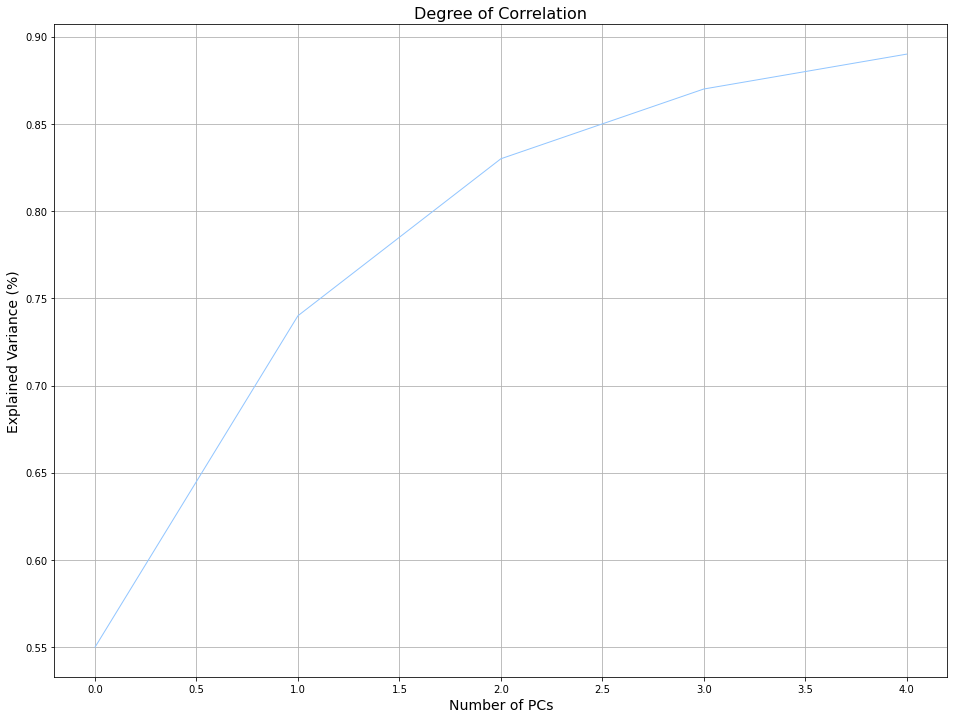

In [7]:
variance_stock = PCA(5).fit(df_merged).explained_variance_ratio_.cumsum().round(2)
plt.plot(variance_stock)
plt.title('Degree of Correlation', fontsize = 16)
plt.xlabel('Number of PCs', fontsize = 14)
plt.ylabel('Explained Variance (%)', fontsize = 14)
plt.show()

Principal Components seem to indicate approximately $55\%$ is explained by the first principal component, whereas two principal components combinedly explain $70\%$ of all variance. If we extend the degree of variance into five, almost $90\%$ is explained.

# Analysis on Eigenvectors

While the major intention in this experiment is to verify how correlated market price fluctuation and global COVID confirmed rate are, it appears that it is correlated to the certain extent. However, it still appears that it does not explain reasonable amount of variance.

## Meaning of Eigenvectors

Intuitively speaking, Principal Component Analysis is a technique to reduce dimensionality. Smaller dimension of features can be achieved by a linear combination of columns, which explain the maximum variation explained. This concept is what we used to understand `correlation` and `systemic risk` in the previous section of analysis. Each Principal Component Loading is an example of `unit vector`.

$$
u := \min(\frac{1}{n} \sum_{i}^{n}(x_{i}^{T}x_{i} - (u_{1}^{T}x_{i})^{2}))
$$

Principal Component Analysis aims for minimizing total distance of a unit vector whose perpendicular distance is minimized as a result. And it is the eigenvector of the covariance matrix of $X$.

$$
Av = \lambda v
$$

## PCA Loadings as "Degree of Impact"

While it is about 'degree of impact', we may verify how large each extent is.

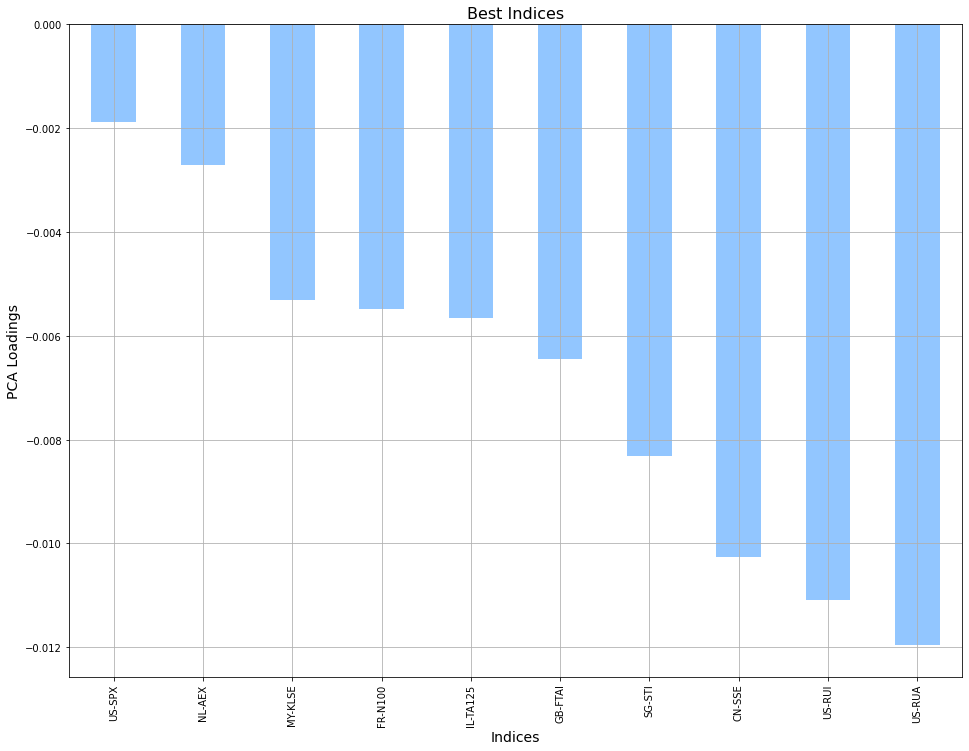

In [8]:
pca_dr = PCA(1).fit(daily_return1)
daily_return_factors = pd.Series(index=daily_return1.columns, data=pca_dr.components_[0])

daily_return_factors.nlargest(10).plot.bar()
plt.title('Best Indices', fontsize=16)
plt.xlabel('Indices', fontsize=14)
plt.ylabel('PCA Loadings', fontsize = 14)
# plt.savefig('Best Indices.png', dpi=300)

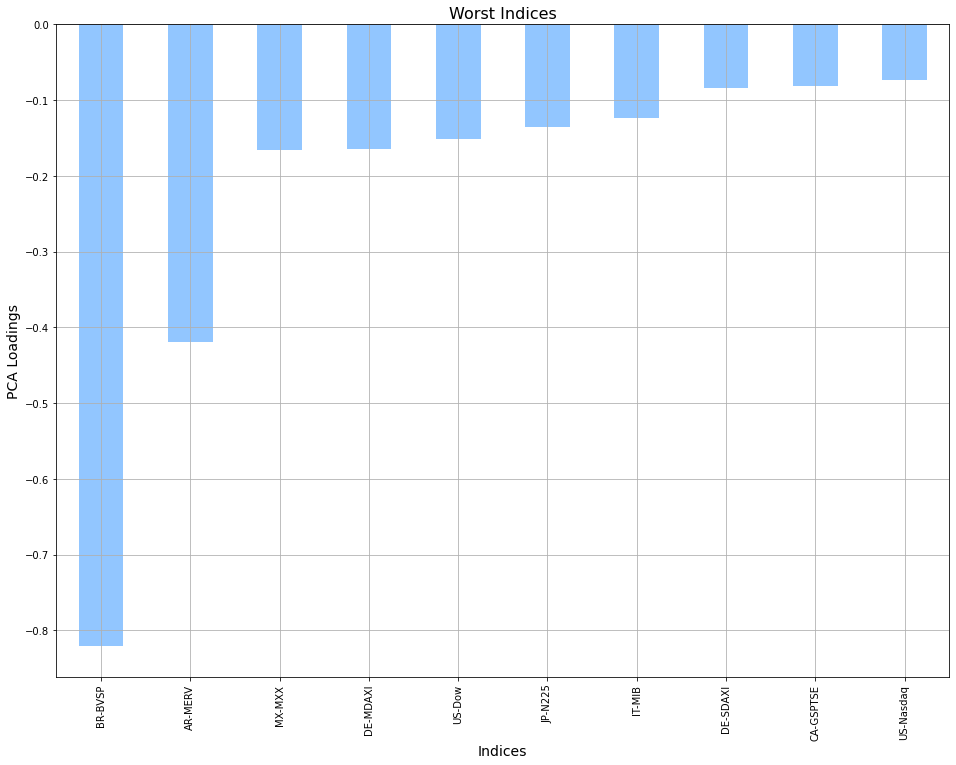

In [9]:
pca_dr = PCA(1).fit(daily_return1)
daily_return_factors = pd.Series(index=daily_return1.columns, data=pca_dr.components_[0])

daily_return_factors.nsmallest(10).plot.bar()
plt.title('Worst Indices', fontsize=16)
plt.xlabel('Indices', fontsize=14)
plt.ylabel('PCA Loadings', fontsize = 14)
# plt.savefig('Best Indices.png', dpi=300)

# Analysis

## K-Means Clustering

In [10]:
pca_covid = PCA(2).fit(daily_confirmed1)
daily_confirmed1 = daily_confirmed1.diff(1)[1:]
daily_confirmed_factors = pd.Series(index=daily_confirmed1.columns, data=pca_covid.components_[0])

df1 = pd.DataFrame(daily_return_factors)
df2 = pd.DataFrame(daily_confirmed_factors)

df_list = []

df1_temp = df1.T
df2_temp = df2.T

for index in df1_temp:
    nation = index.split("-")[0]
    indice = index.split("-")[1]
    factor_return = df1_temp[index]
    try:
        factor_input = df2_temp[nation]
    except:
        factor_input = df2_temp['FR'] + df2_temp['DE'] / 2
    
    df_list.append(
        [nation, 
         indice, 
         index, 
         factor_input.values[0], 
         factor_return.values[0]
        ]
    )

df = pd.DataFrame(
    df_list,
    columns=["Country", "Index", "Full-Name", "Confirmed", "Return"]
)

index = df.iloc[:,1].values.tolist()
df_default = df
df = df[['Confirmed', 'Return']]
df.index = index

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42
}

sse = []

kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=100,
    max_iter=300,
    random_state=42
)

kmeans.fit(df)

print("The lowest SSE:", kmeans.inertia_)
print("Final Centroids:", kmeans.cluster_centers_)
print("Number of Iterations Required:", kmeans.n_iter_)

a = df[kmeans.labels_== 0]
b = df[kmeans.labels_== 1]
c = df[kmeans.labels_== 2]

a = a.index.values.tolist()
b = b.index.values.tolist()
c = c.index.values.tolist()

groups = pd.DataFrame([a, b, c], index=['Group A', 'Group B', 'Group C'])
groups = groups.T

print("RESULTS:")

groups

The lowest SSE: 0.43867003721274683
Final Centroids: [[-0.05606432 -0.05434758]
 [-0.35523704 -0.03186833]
 [-0.14895533 -0.61949229]]
Number of Iterations Required: 3
RESULTS:


,Group A,Group B,Group C
0,N225,Dow,MERV
1,SSE,Nasdaq,BVSP
2,Shenzhen,FTSE100,None
3,DAX,FTSE250,None
4,JKSE,FTAI,None
5,PSEI,FCHI,None
6,AXKO,RUI,None
7,KSII,RUT,None
8,NZ50,RUA,None
9,GSPTSE,N100,None


### Visualization

As a data scientist, I add "visualization" to let my analysis more intuitive and straightforward.

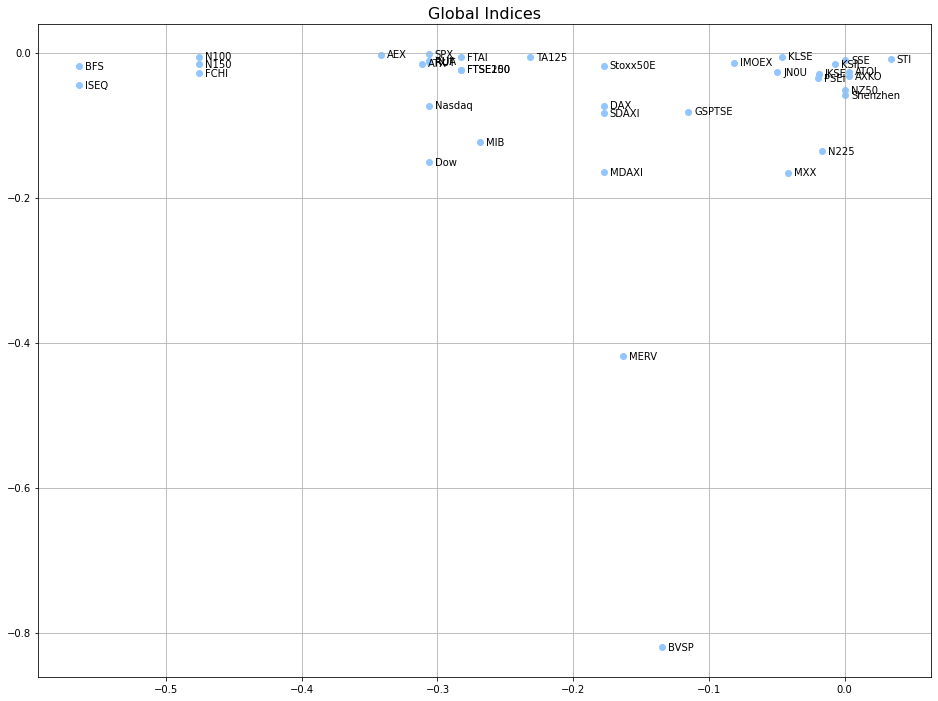

In [11]:
fig = plt.scatter(df[['Confirmed']].values, df[['Return']].values)

labels = df.index.tolist()

for x_pos, y_pos, label in zip(df[['Confirmed']].values, df[['Return']].values, labels):
    plt.annotate(label,
                 xy = (x_pos, y_pos),
                 xytext=(6,0),
                 textcoords='offset points',
                 ha='left',
                 va='center'
                )

plt.title("Global Indices", fontsize = 16)
# plt.savefig('Scatterplot.png', dpi=300)

## Generalized Linear Model

Finally, I use generalized linear model, which is to have statistical regression to confirm correlation between spread of Coronavirus and trend of performance of market indices.

In [12]:
import statsmodels.formula.api as smf

GLSAR = smf.glm(
    data=df,
    formula='Return~Confirmed'
    ).fit()

GLSAR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Return   No. Observations:                   39
Model:                            GLM   Df Residuals:                       37
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                        0.021119
Method:                          IRLS   Log-Likelihood:                 20.911
Date:                Sun, 30 May 2021   Deviance:                      0.78139
Time:                        10:46:19   Pearson chi2:                    0.781
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0928      0.036     -2.580      0.010      -0.163      -0.022
Confirmed     -0.0996      0.138     -0.723      0.470      -0.370       0.170
==============================================================================
"""

## Takeaways

To sum up, it appears that machine learning algorithms prove that Coronavirus-19 is not the appropriate factor to generalize the fluctuation in the stock market. There are a number of factors that provide some insights; __(1) strong monetary policy and fiscal policy globally done in 2020, (2) the gap between real variables and nominal variables in macroeconomy, and (3) sudden euphoria arose from sudden increase in asset price from massive money supply__.

# Bibliography

[1] Kritzman, Mark and Li, Yuanzhen and Page, Sebastien and Rigobon, Roberto, Principal Components as a Measure of Systemic Risk (June 30, 2010). MIT Sloan Research Paper No. 4785-10, https://doi.org/10.3905/jpm.2011.37.4.112, Available at SSRN: https://ssrn.com/abstract=1633027 or http://dx.doi.org/10.2139/ssrn.1633027